# PROJET AD50 (AFC, Clustering, K-Means, Silhouette)

_Auteurs_ : **Blladi Ismail, Drissi Slimani Youness, El Yassami Hafsa**

### Libraries

On va utiliser deux différents librairies pour notre projet pour appliquer toutes les analyses demandées.

In [2]:
#Librairie FactoMineR
library(FactoMineR)
library(factoextra)

Warning message:
"package 'FactoMineR' was built under R version 3.4.4"Warning message:
"package 'factoextra' was built under R version 3.4.4"Loading required package: ggplot2
Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


In [3]:
#Librairie ADE4, Cluster
library(cluster)
library(ade4)

Warning message:
"package 'ade4' was built under R version 3.4.4"
Attaching package: 'ade4'

The following object is masked from 'package:FactoMineR':

    reconst



In [4]:
#Libraries Plots
library(gplots)
library(corrplot)

Warning message:
"package 'gplots' was built under R version 3.4.4"
Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess

Warning message:
"package 'corrplot' was built under R version 3.4.4"corrplot 0.84 loaded


Après on importe notre jeu de données d'une enquête Budget-temps Multimédia.
Cette enquête a été faite pour savoir le nombre de 'contact média' relatifs à presque 4433 personnes interrogées.

In [5]:
bdtmp_multim = read.csv("~/AD50/AFC/budget_temps_multimedia.csv", header=TRUE, row.names=1, sep=";")

###### Ce tableau de contingence croise :
Les types de contacts-média (variables) citant :
* Radio
* Télévision
* Quotidien National
* Quotidien Régional
* Presse Magazine
* Presse TV

avec professions, sexe, âge, niveau d'éducation (individus) 

_Comme illustre le tableau ci dessous_:

In [8]:
bdtmp_multim

,Radio,Tel.,Quot.N,Quot.R,P.Mag,P.TV
Agriculteur,96,118,2,71,50,17
Petit patron,122,136,11,76,49,41
Prof. Cad. S.,193,184,74,63,103,79
Prof. Interm,360,365,63,145,141,184
Employé,511,593,57,217,172,306
Ouvrier qual,385,457,42,174,104,220
Ouvrier n-q,156,185,8,69,42,85
Inactif,1474,1931,181,852,642,782
Homme,1630,1900,285,854,621,776
Femme,1667,2069,152,815,683,938


Le tableau ci-dessous représente les valeurs numériques dans le tableau de contingence sous forme de cercles.
Ci le cercle est grand, cela veut dire qu'on a une grande valeur, sinon le cas opposé :

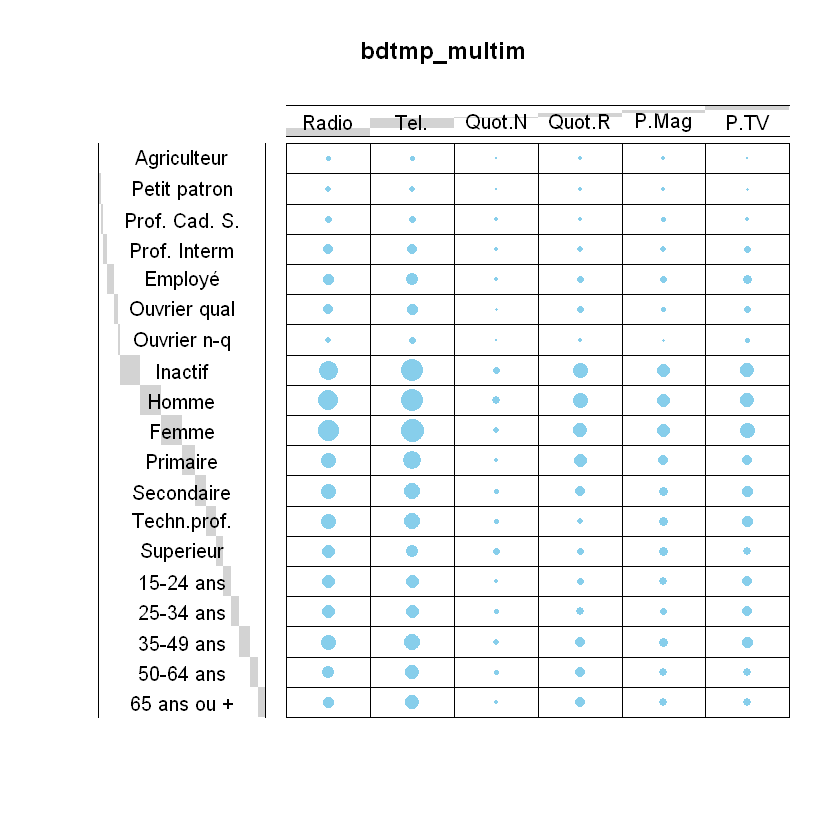

In [9]:
t_bdtmp_multim = as.table(as.matrix(bdtmp_multim))
balloonplot(t(t_bdtmp_multim) ,main ="bdtmp_multim", xlab ="", ylab="",
            label = FALSE, show.margins = FALSE)

## 1- Test du χ² :

Ce test permet de vérifier si un échantillon d'une variable aléatoire Y donne des observations comparables à celles d'une loi de probabilité P définie a priori dont on pense, pour des raisons théoriques ou pratiques, qu'elle devrait être la loi de Y. L’hypothèse nulle (H0) d'un test du χ2 d'adéquation (dénommé aussi test du χ2 de conformité ou test du χ2 d'ajustement) est donc la suivante : la variable aléatoire Y suit la loi de probabilité P.

En termes de valeur-p, l'hypothèse nulle (l'observation est suffisamment proche de la théorie) est généralement rejetée lorsque **valeur-p** est inférieure ou égale à **0,05**


Dans notre analyse, on va se focaliser sur le croisement entre les 8 professions et les types de média, et les autres lignes seront supplémentaires (pour l'aide à l'analyse). Du coup on va appliquer le test du χ² sur ce dernier :

In [15]:
df <- bdtmp_multim[1:8,]
df

,Radio,Tel.,Quot.N,Quot.R,P.Mag,P.TV
Agriculteur,96,118,2,71,50,17
Petit patron,122,136,11,76,49,41
Prof. Cad. S.,193,184,74,63,103,79
Prof. Interm,360,365,63,145,141,184
Employé,511,593,57,217,172,306
Ouvrier qual,385,457,42,174,104,220
Ouvrier n-q,156,185,8,69,42,85
Inactif,1474,1931,181,852,642,782


In [17]:
test <- chisq.test(bdtmp_multim[1:8,])  

In [18]:
test$expected #: la matrice attendue sous l'hypothèse nulle d'absence de biais.

,Radio,Tel.,Quot.N,Quot.R,P.Mag,P.TV
Agriculteur,94.21521,113.4183,12.51631,47.63626,37.23458,48.97933
Petit patron,115.77293,139.3700,15.38021,58.53608,45.75436,60.18647
Prof. Cad. S.,185.23668,222.9919,24.60833,93.65773,73.20697,96.29835
Prof. Interm,334.80998,403.0515,44.47885,169.28366,132.31950,174.05651
Employé,493.96448,594.6451,65.62222,249.75396,195.21860,256.79561
Ouvrier qual,367.81191,442.7799,48.86309,185.96981,145.36212,191.21311
Ouvrier n-q,145.04884,174.6129,19.26945,73.33831,57.32443,75.40604
Inactif,1560.13997,1878.1303,207.26154,788.82418,616.57943,811.06458


In [20]:
test


	Pearson's Chi-squared test

data:  bdtmp_multim[1:8, ]
X-squared = 276, df = 35, p-value < 2.2e-16


Comme vous le voyez le test du χ² nous donne une **valeur-p inférieure à 2.2e-16** ce qui veut dire que l'*hypothèse nulle est  rejetée*

On conclue alors qu'**il y a une dépendance forte entre les variables lignes et colonnes**

## 2- Analyse factorielle des correspondances (AFC) :

In [6]:
#Methode AFC FactoMineR
res.ca <- CA(bdtmp_multim, row.sup = 9:nrow(bdtmp_multim),graph=FALSE)


#Methode AFC ADE4
res.ca1 <- dudi.coa(bdtmp_multim[1:8,],scannf= FALSE, nf = 2) # hclust eclust

#### 2.1 Valeurs propres / Variances

L’examination des valeurs propres permet de déterminer le nombre d’axes principaux à considérer. Les valeurs propres correspondent à la quantité d’informations retenue par chaque axe. Elles sont grandes pour le premier axe et petites pour l’axe suivant.

In [10]:
eig.val <- get_eigenvalue (res.ca)
eig.val

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,1.385729e-02,62.1981806,62.19818
Dim.2,7.210685e-03,32.3650288,94.56321
Dim.3,8.247314e-04,3.7017919,98.26500
Dim.4,3.038516e-04,1.3638326,99.62883
Dim.5,8.269302e-05,0.3711661,100.00000


Le graphique des valeurs propres:

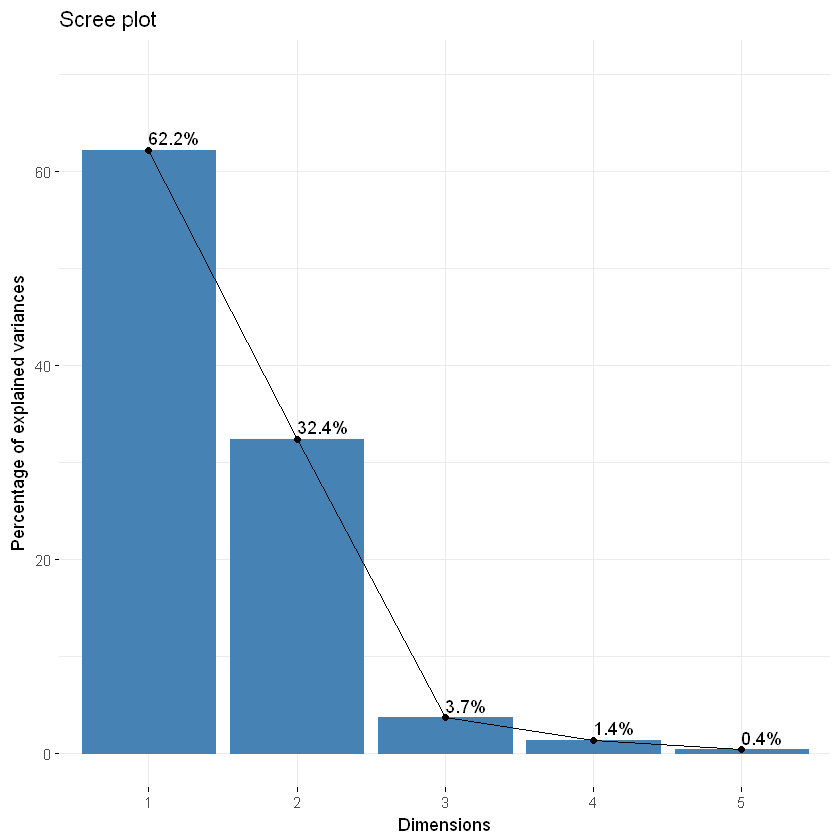

In [24]:
fviz_screeplot(res.ca, addlabels = TRUE, ylim = c(0, 70)) # Inerties

Deux facteurs sont dominants et représentent près de 95% de l’inertie totale. Plus la rétention est élevée, plus la subtilité contenue dans les données d’origine est conservée dans la solution de l’AFC à faible dimension.

On a la représentation graphique suivante :

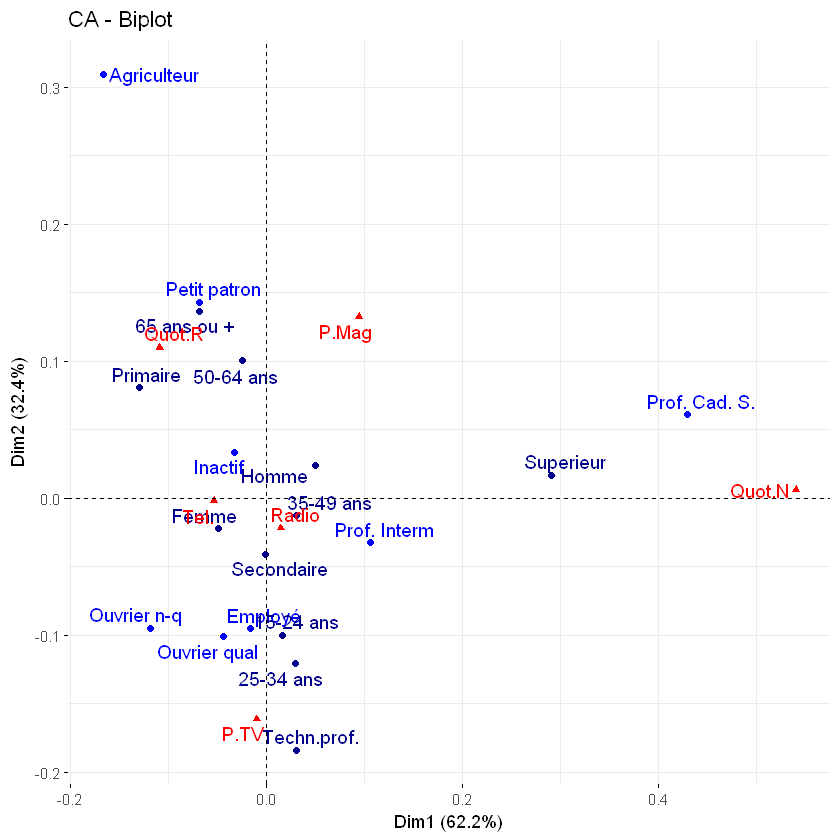

In [12]:
fviz_ca_biplot(res.ca, repel = TRUE) #Sans fleches

-Les individus sont représentés par un cercle :
    * Bleu normal : Individus considérés dans l'analyse AFC
    * Bleu foncé : Individus supplémentaires pour aide à l'interpretation

-Les variables sont représentées par un triangle rouge 

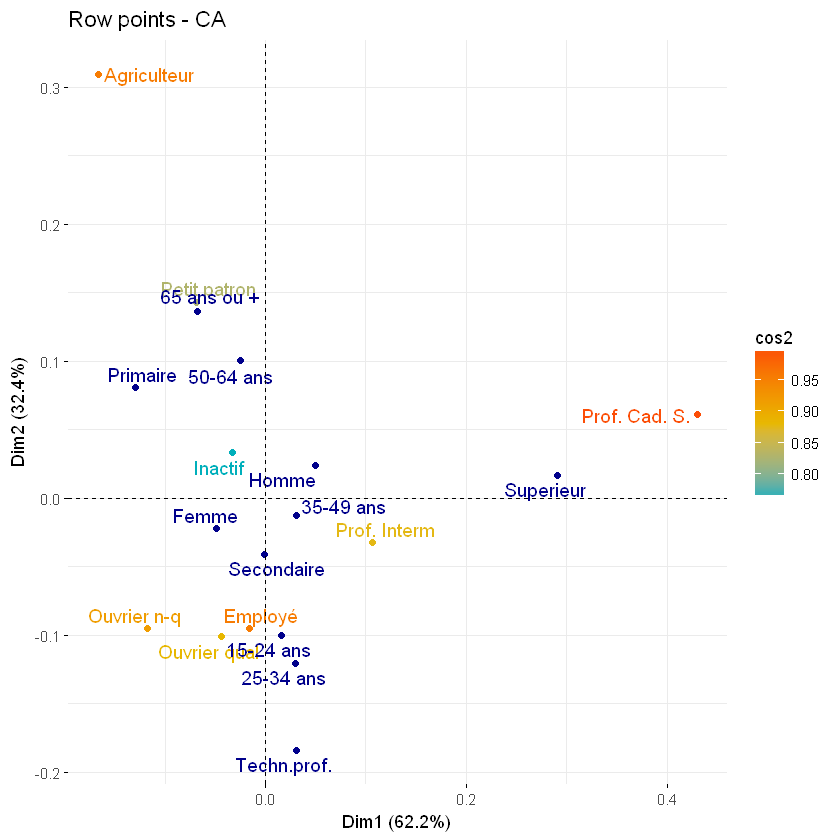

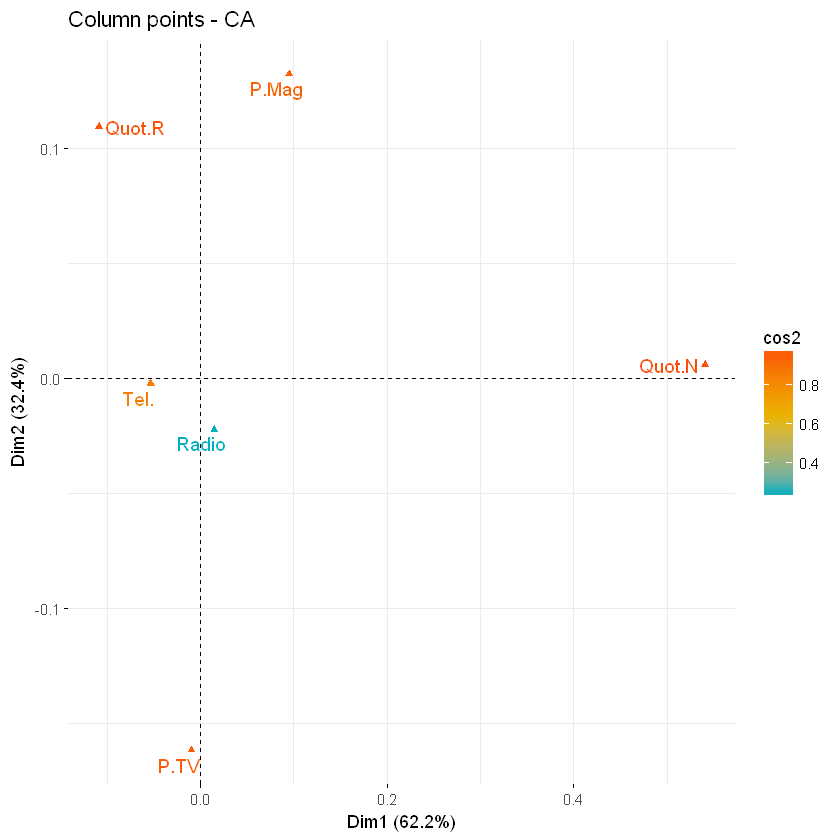

In [15]:
#Cos²
fviz_ca_row(res.ca, col.row = "cos2",
            gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), 
            repel = TRUE)
fviz_ca_col(res.ca, col.col = "cos2", 
            gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
            repel = TRUE)

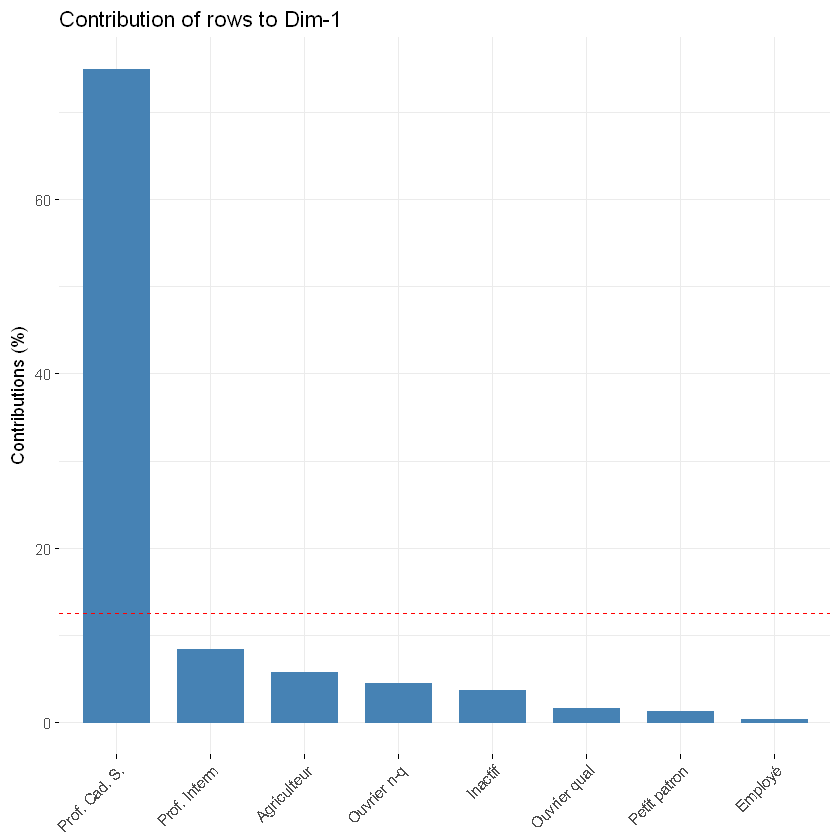

In [19]:
#Contribution 
# Contributions of rows to dimension 1
fviz_contrib(res.ca, choice = "row", axes = 1, top = 10)

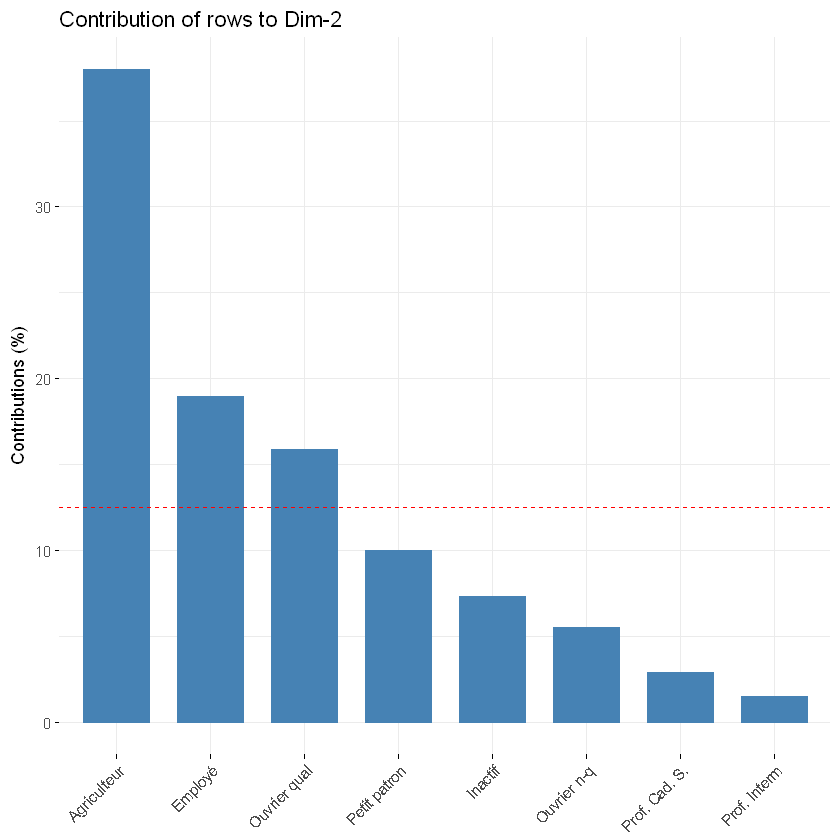

In [20]:
#Contribution
# Contributions of rows to dimension 2
fviz_contrib(res.ca, choice = "row", axes = 2, top = 10)

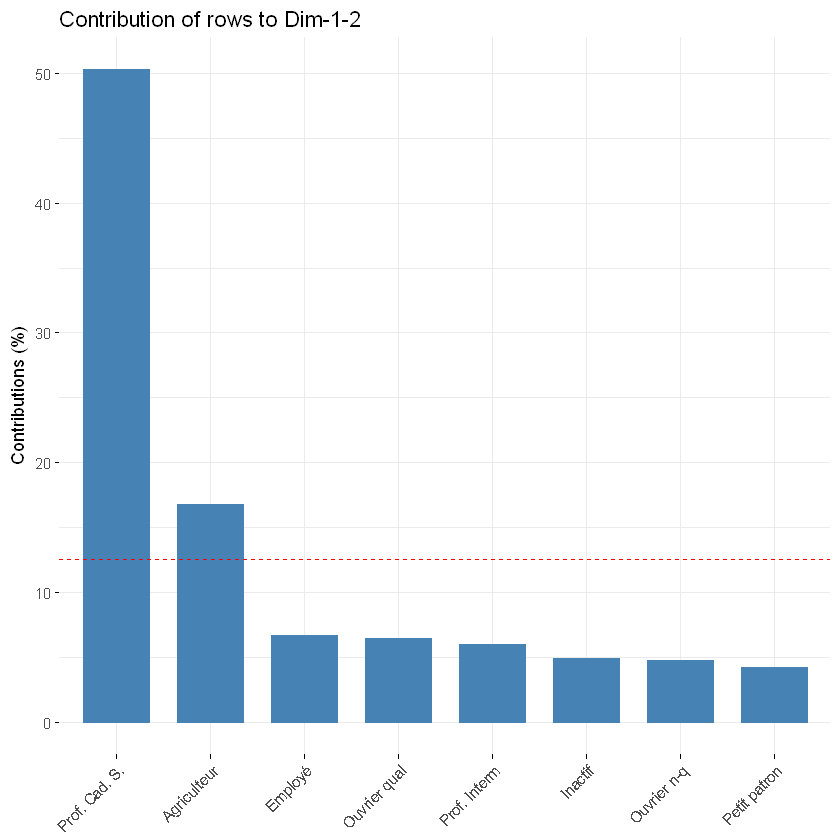

In [24]:
#Contribution
# Total contribution to dimension 1 and 2
fviz_contrib(res.ca, choice = "row", axes = 1:2, top = 10)

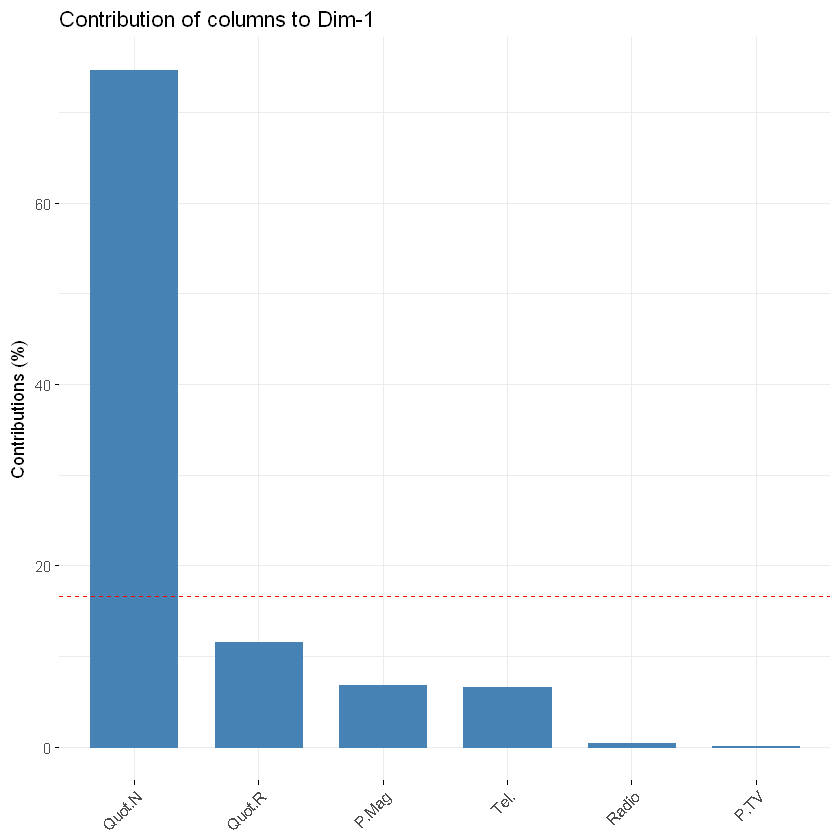

In [25]:
#Contribution
# Contributions of cols to dimension 1
fviz_contrib(res.ca, choice = "col", axes = 1, top = 10)

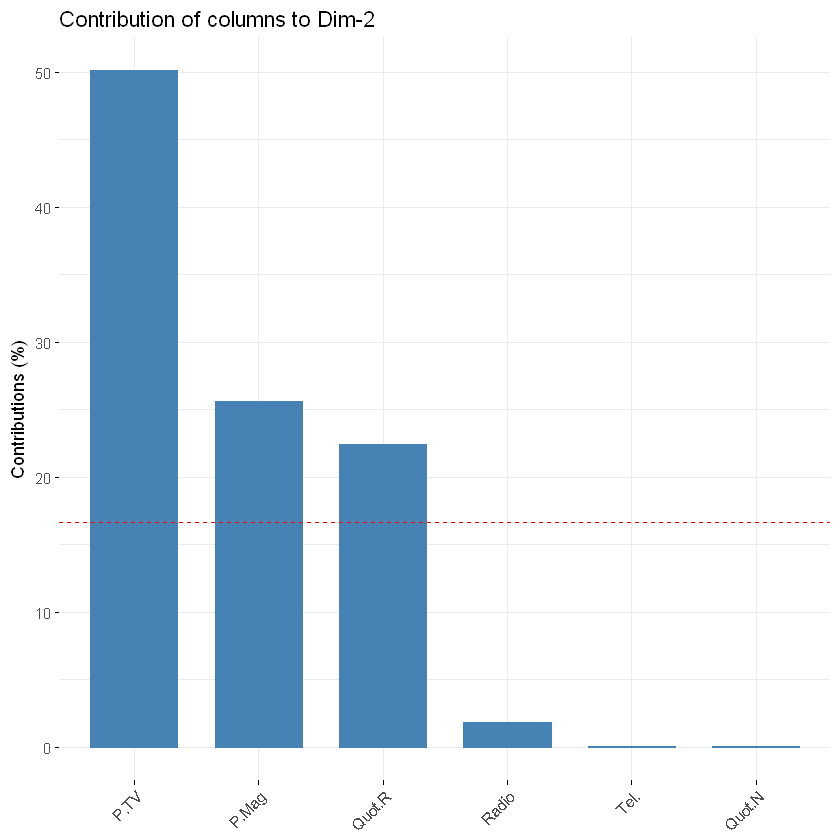

In [26]:
# Contributions of cols to dimension 2
fviz_contrib(res.ca, choice = "col", axes = 2, top = 10)

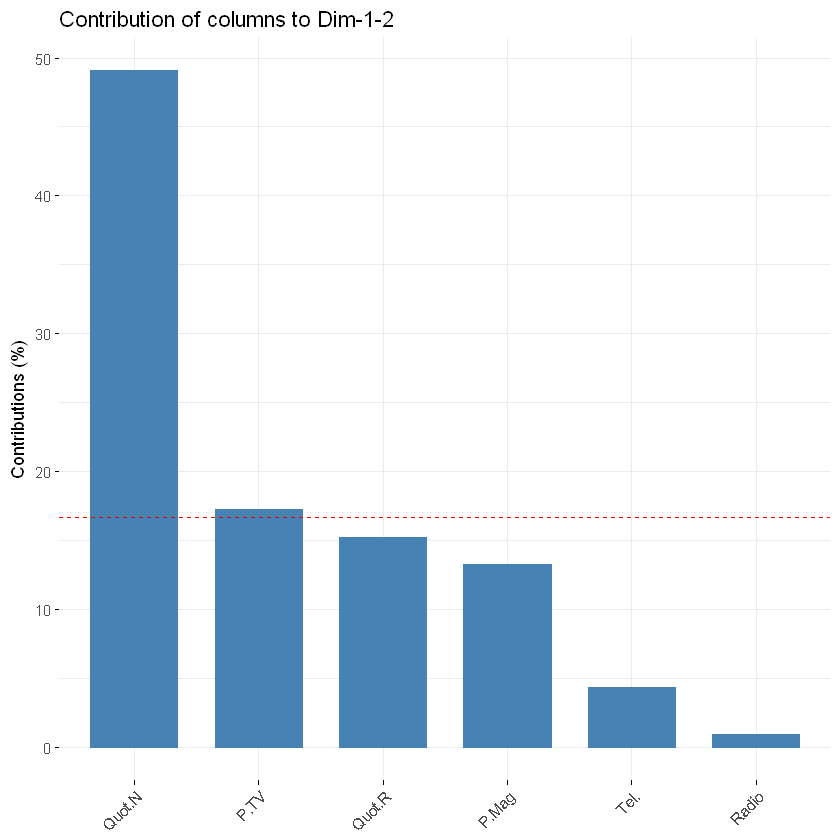

In [27]:
# Total contribution to dimension 1 and 2
fviz_contrib(res.ca, choice = "col", axes = 1:2, top = 10)

Interprétation sur les graphes:

* L'élément "**Quotidien national**" a une distance au point moyen très élevée, et il contribue pour à peu près 73% à la construction de l'axe 1, qui en est très proche vu que le cos² est supérieur à **0,9**
* L'axe 1 est caractérisé également par la l'individu "**Prof. Cad. S.**" et l'individu supplémentaire "**Supérieur**"

--> On conclue qu'il y une forte association entre **Prof. Cad. S.** , **Quotidien national**, et le niveau d'études **Supérieur**

* Le second axe oppose la "**Presse TV**" à la "**Presses Magazine**" et le "**Quotidien Régional**"
* la "**Presse TV**" est associée aux catégories: "Employé" et "Ouvrier", et aux classes d'âges plutôt jeunes (< 34 ans). Tant dit que la "**Presses Magazine**" et le "**Quotidien Régional**" sont associés aux catégoriers :  "Agriculteur" et "Petit patron", et aux classes d'âges plus élevées

## 3- Classification ascendante hiérarchique (CAH) :

Le principe de la CAH est de rassembler des individus selon un critère de ressemblance défini au préalable qui s’exprimera sous la forme d’une matrice de distances, exprimant la distance existant entre chaque individu pris deux à deux. Deux observations identiques auront une distance nulle. Plus les deux observations seront dissemblables, plus la distance sera importante. La CAH va ensuite rassembler les individus de manière itérative afin de produire un dendrogramme ou arbre de classification.

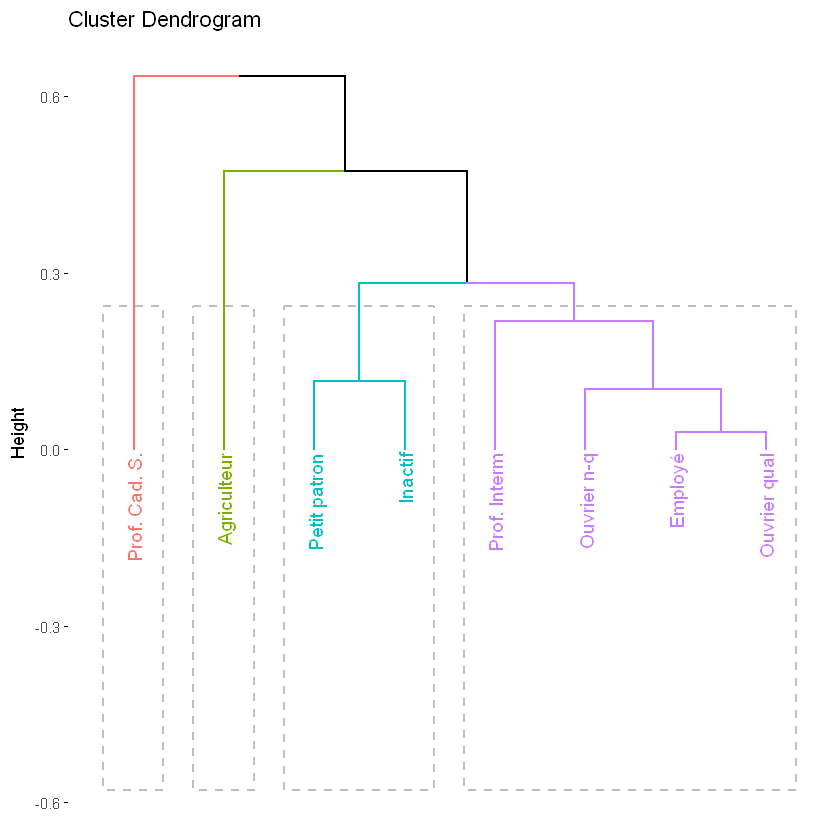

In [51]:
#Methode CLUSTER Factoextra 
res.hc <- eclust(res.ca1$li[,1:2], "hclust", k = 4,
                 method = "ward.D2", graph = FALSE)
fviz_dend(res.hc, rect = TRUE, show_labels = TRUE) 

Nos individus sont regroupés en 4 classes

## 4- K-moyennes (K-means) / Silhouette:

* K-means est un algorithme de clustering, en d’autres termes il permet de réaliser des analyses non supervisées, d’identifier un pattern au sein des données et de regrouper les individus ayant des caractéristiques similaires.

* Silhouette fait référence à une méthode d'interprétation et de validation de la cohérence au sein de grappes de données . La technique fournit une représentation graphique succincte de la position de chaque objet dans son cluster. 
La valeur de silhouette est une mesure de la similarité d'un objet avec son propre cluster (cohésion) par rapport à d'autres clusters (séparation). La silhouette va de -1 à +1, où une valeur élevée indique que l'objet est bien adapté à son propre cluster et mal adapté aux clusters voisins. Si la plupart des objets ont une valeur élevée, la configuration du clustering est appropriée. Si de nombreux points ont une valeur basse ou négative, la configuration du cluster peut comporter trop ou trop peu de clusters.

###### K-MEANS : RUN 1  

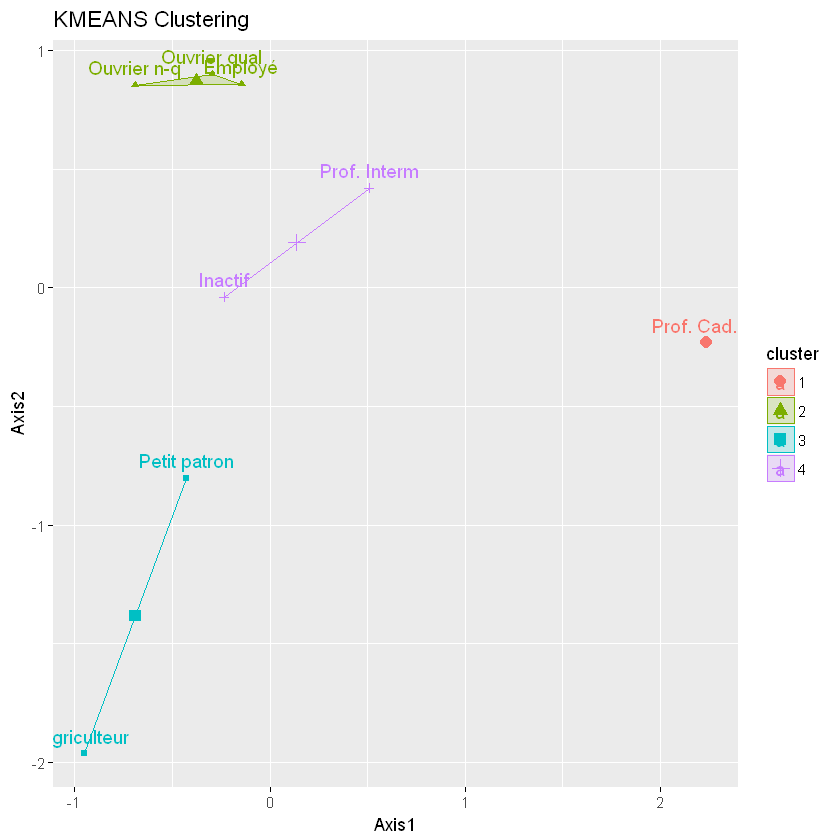

In [52]:
#Plot K-means run = 1
km.res1 <- eclust(res.ca1$li[,1:2], "kmeans", k =4,nstart = 1, graph = TRUE) #nstart=1 meme résultat que 

  cluster size ave.sil.width
1       1    1          0.00
2       2    3          0.57
3       3    2          0.21
4       4    2          0.02


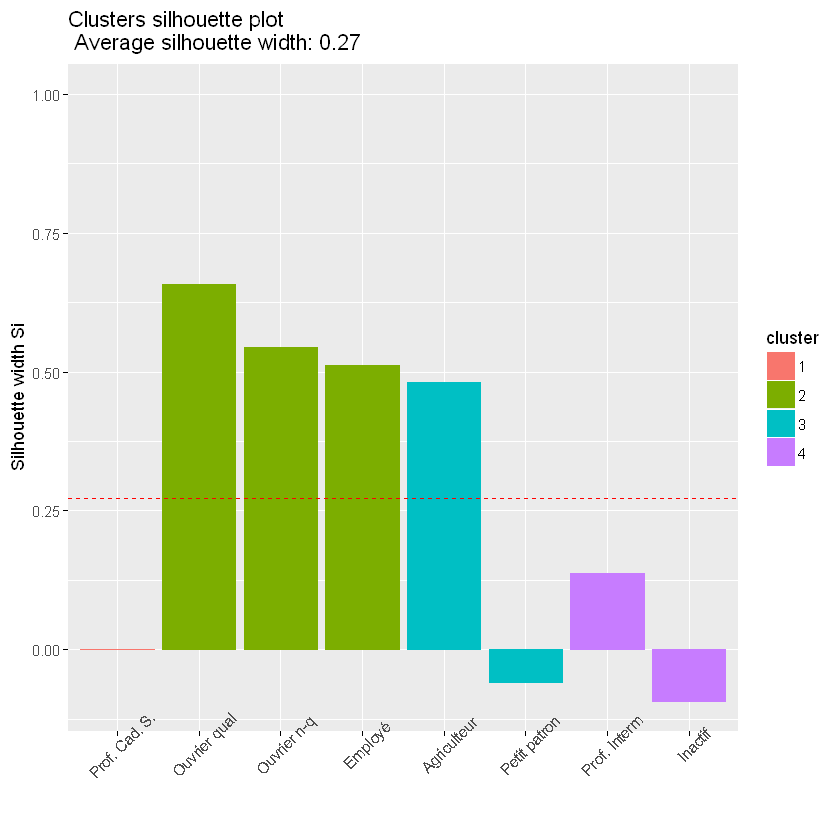

In [53]:
#Plot Silhouette run = 1
fviz_silhouette(km.res1, label=TRUE)

###### K-MEANS : RUN 2  

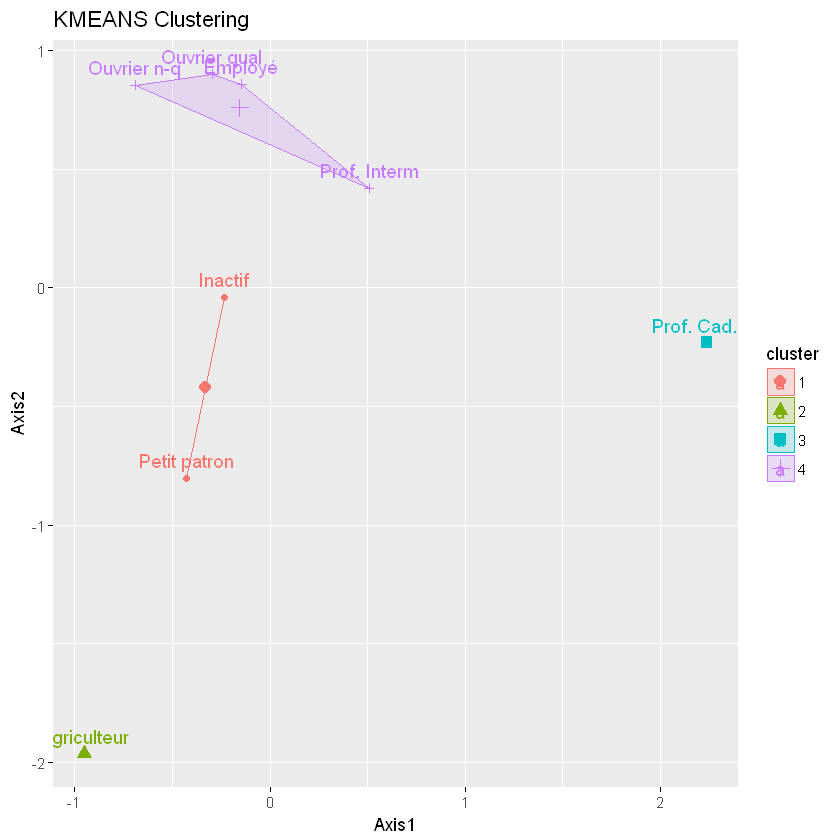

In [54]:
#Plot K-means run = 2
km.res2 <- eclust(res.ca1$li[,1:2], "kmeans", k =4,nstart = 2, graph = TRUE)

  cluster size ave.sil.width
1       1    2          0.30
2       2    1          0.00
3       3    1          0.00
4       4    4          0.37


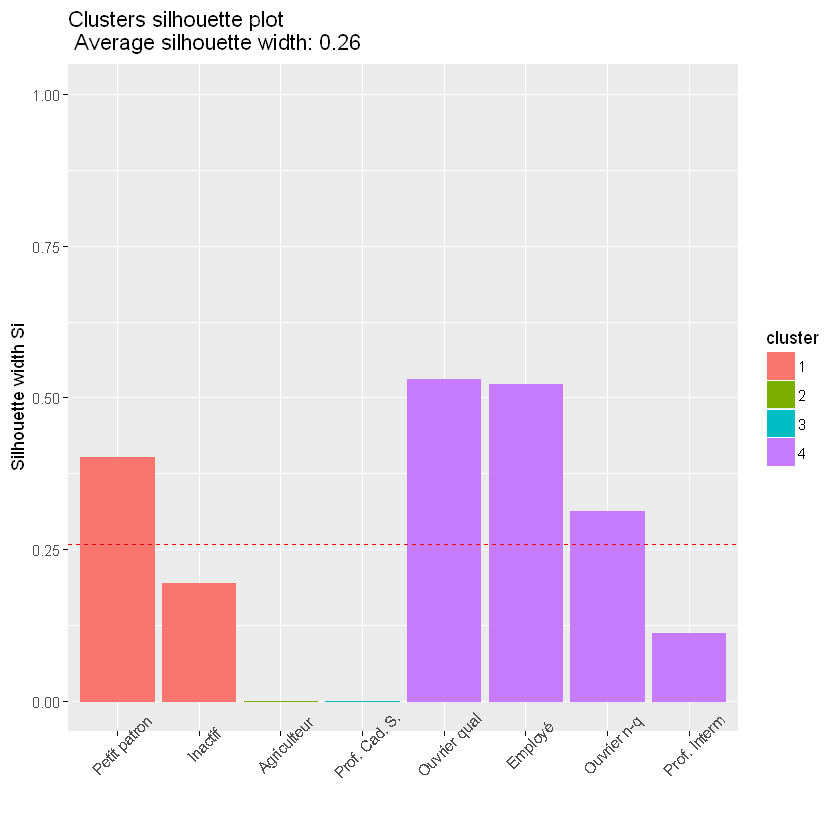

In [55]:
#Plot Silhouette run = 2
fviz_silhouette(km.res2, label=TRUE)

###### K-MEANS : RUN 3

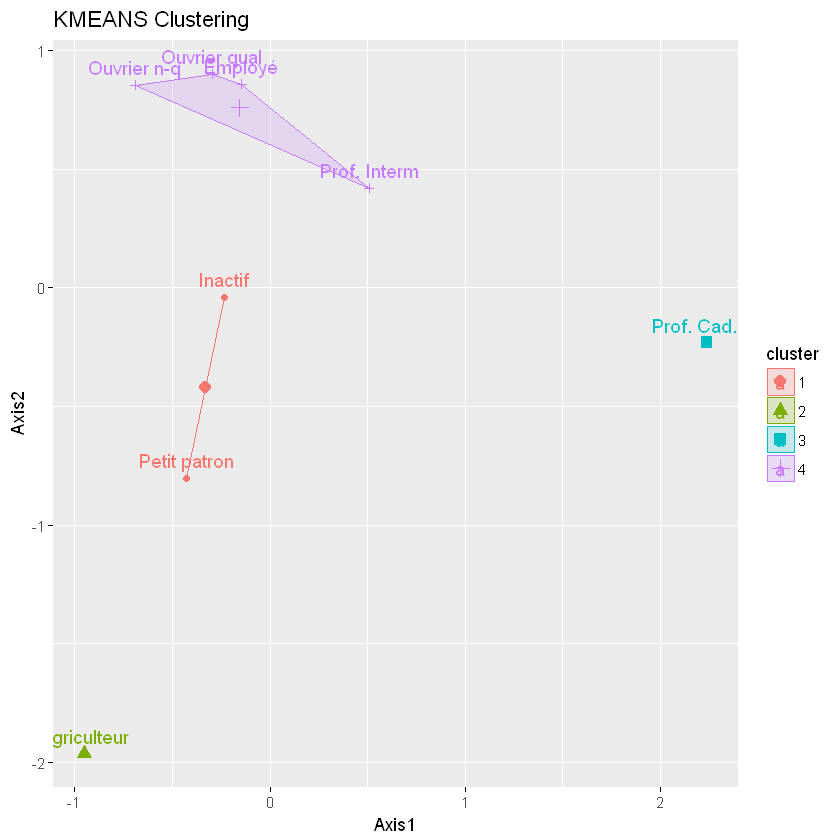

In [9]:
#Plot K-means run = 3
km.res3 <- eclust(res.ca1$li[,1:2], "kmeans", k =4,nstart = 3, graph = TRUE)

  cluster size ave.sil.width
1       1    2          0.30
2       2    1          0.00
3       3    1          0.00
4       4    4          0.37


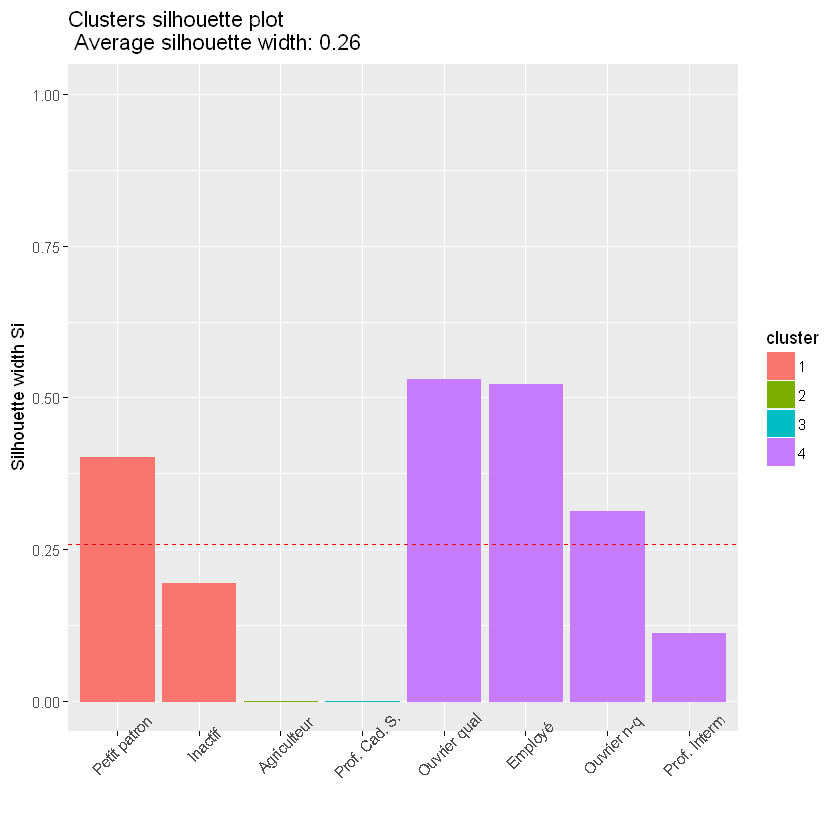

In [10]:
#Plot Silhouette run = 3
fviz_silhouette(km.res3, label=TRUE)

###### Interpretation des k-means & Silhouette :

* On constate que après le **run=2**, on aura le même résultat de classification
* Pour le graphe de Silhouette (k-means **run=1**) comporte des valeurs négatives: **"Petit patron"** et **"Inactif"**. Cela veut dire qu'ils n'appartiennent au bon groupe et pourraient être déplacé dans le groupe le plus proche
* La largeur de silhouette de la partition est égale à **0,26**, ce qui implique que la nature de la structure est plus au moins raisonnable
* le **run=2** et **run=3** ne comporte aucun indice de silhouette négatif et il y a présence de deux groupes : **le deuxième** et **le troisième** qui sont des individus isolés d'où l'indice de silhouette égal à **0**